In [1]:
import naverAPI as napi
import json
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import os

In [2]:
current_dir = os.getcwd()
#print(current_dir)
dotenv_path = os.path.join(current_dir, '.env')
load_dotenv(dotenv_path=dotenv_path)
client_id = os.getenv("NAVER_CLIENT_ID")
client_secret = os.getenv("NAVER_CLIENT_SECRET")

categroy_json = pd.read_json('output/naverCategoryTable.json')
df_category = pd.DataFrame(categroy_json)
food = df_category[df_category['p_id'] == 50000006] # 음식 카테고리
b = food[['id','name']].to_dict('tight')
to_be_found = np.array(b['data'])
test_category_list = napi.listToCategoryDict(to_be_found)
print(test_category_list)
res = napi.createTrendData(client_id, client_secret, test_category_list, "2025-10-02", "2025-10-09")


[{'name': np.str_('축산물'), 'param': ['50000145']}, {'name': np.str_('수산물'), 'param': ['50000159']}, {'name': np.str_('농산물'), 'param': ['50000160']}, {'name': np.str_('반찬'), 'param': ['50000146']}, {'name': np.str_('김치'), 'param': ['50000147']}, {'name': np.str_('음료'), 'param': ['50000148']}, {'name': np.str_('과자/베이커리'), 'param': ['50000149']}, {'name': np.str_('유가공품'), 'param': ['50000150']}, {'name': np.str_('냉동/간편조리식품'), 'param': ['50000026']}, {'name': np.str_('건강식품'), 'param': ['50000023']}, {'name': np.str_('다이어트식품'), 'param': ['50000024']}, {'name': np.str_('통조림/캔'), 'param': ['50011940']}, {'name': np.str_('제과/제빵재료'), 'param': ['50012460']}, {'name': np.str_('조미료'), 'param': ['50012520']}, {'name': np.str_('식용유/오일'), 'param': ['50012620']}, {'name': np.str_('소스/드레싱'), 'param': ['50012782']}, {'name': np.str_('가루/분말류'), 'param': ['50013360']}, {'name': np.str_('잼/시럽'), 'param': ['50013520']}, {'name': np.str_('라면/면류'), 'param': ['50013960']}, {'name': np.str_('장류'), 'param': ['500

In [3]:
with open('output/res_temp.json', 'w', encoding='utf-8') as f:
            json.dump(res, f, ensure_ascii=False, indent=4)
    

In [4]:
with open('output/res_temp.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
datalist=data['datalist']
data

{'startdate': '2025-10-02',
 'enddate': '2025-10-09',
 'datalist': [{'title': '축산물',
   'category': ['50000145'],
   'data': [{'period': '2025-10-02', 'ratio': 34.36252990068879},
    {'period': '2025-10-03', 'ratio': 28.092679805876664},
    {'period': '2025-10-04', 'ratio': 23.503983589730456},
    {'period': '2025-10-05', 'ratio': 20.808697971536578},
    {'period': '2025-10-06', 'ratio': 19.03942170044545},
    {'period': '2025-10-07', 'ratio': 20.56579423825982},
    {'period': '2025-10-08', 'ratio': 21.452729206857327},
    {'period': '2025-10-09', 'ratio': 25.05870818959138}]},
  {'title': '수산물',
   'category': ['50000159'],
   'data': [{'period': '2025-10-02', 'ratio': 37.622163012942},
    {'period': '2025-10-03', 'ratio': 32.48138412787868},
    {'period': '2025-10-04', 'ratio': 29.151254606571815},
    {'period': '2025-10-05', 'ratio': 27.158235569826417},
    {'period': '2025-10-06', 'ratio': 27.560901818337634},
    {'period': '2025-10-07', 'ratio': 29.958882055538034},
  

In [5]:
data_period = []
data_ratio = []
data_title = []
for dd in datalist:
    data_title.append(dd['title'])
    temp = []
    temp1 = []
    for ddd in dd['data']:
        temp.append(ddd['ratio'])
        temp1.append(ddd['period'])
    data_ratio.append(temp)
    data_period.append(temp1)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

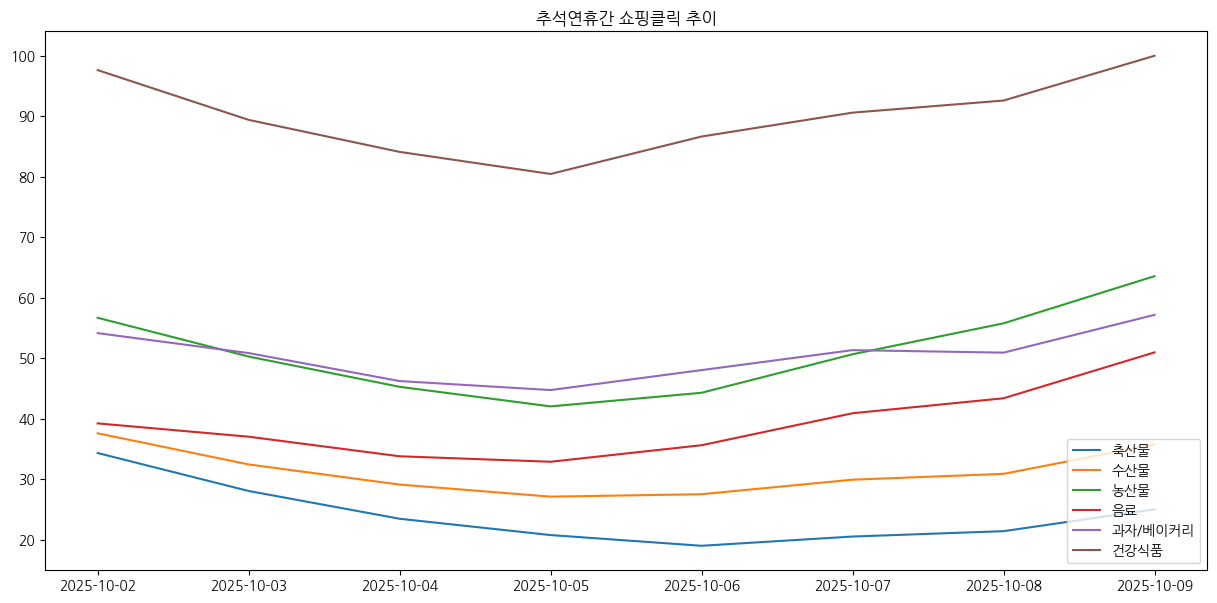

In [10]:

plt.figure(figsize=(15,7))
for i, title in enumerate(data_title):
    if max(data_ratio[i]) > 30:
        plt.plot(data_period[i], data_ratio[i], label=title)
plt.legend(loc='lower right')
plt.title('추석연휴간 쇼핑클릭 추이')
plt.show()

In [ ]:
import naverAPI as napi
import json
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import os

In [18]:
current_dir = os.getcwd()
#print(current_dir)
dotenv_path = os.path.join(current_dir, '.env')
load_dotenv(dotenv_path=dotenv_path)
client_id = os.getenv("NAVER_CLIENT_ID")
client_secret = os.getenv("NAVER_CLIENT_SECRET")

categroy_json = pd.read_json('output/naverCategoryTable.json')
df_category = pd.DataFrame(categroy_json)
df_category[df_category['level']==1]


,id,p_id,name,level
0,50000000,0,패션의류,1
78,50000001,0,패션잡화,1
413,50000002,0,화장품/미용,1
595,50000003,0,디지털/가전,1
1421,50000004,0,가구/인테리어,1
1833,50000005,0,출산/육아,1
2359,50000006,0,식품,1
3046,50000007,0,스포츠/레저,1
3618,50000008,0,생활/건강,1
5054,50000009,0,여가/생활편의,1


# 시간대별 쇼핑 클릭 추이수

In [35]:


def draw_shopping_plot(search_cat, startdate, enddate, threshold=30, gender:str=None, ages:list=None):
 # 음식 카테고리
    b = search_cat[['id','name']].to_dict('tight')
    to_be_found = np.array(b['data'])
    test_category_list = napi.listToCategoryDict(to_be_found)
    print(len(test_category_list))
    res = napi.createTrendData(client_id, client_secret, test_category_list, startdate, enddate, gender, ages)

    with open('output/res_temp.json', 'w', encoding='utf-8') as f:
                json.dump(res, f, ensure_ascii=False, indent=4)

    datalist=res['datalist']
    data_period = []
    data_ratio = []
    data_title = []
    for dd in datalist:
        data_title.append(dd['title'])
        temp = []
        temp1 = []
        for ddd in dd['data']:
            temp.append(ddd['ratio'])
            temp1.append(ddd['period'])
        data_ratio.append(temp)
        data_period.append(temp1)


    plt.figure(figsize=(15,7))
    for i, title in enumerate(data_title):
        #print(title)
        #print(data_ratio[i])
        if max(data_ratio[i])>threshold:
            plt.plot(data_period[i], data_ratio[i], label=title)
    plt.legend()
    plt.xticks(rotation = 45, ha ='right')
    ax = plt.gca()

    # 모든 x축 레이블 객체를 리스트로 가져옵니다.
    xticklabels = ax.get_xticklabels()

    # 강조하고 싶은 문자열을 정의합니다.
    highlight_name = ["2025-10-03", "2025-10-04","2025-10-05","2025-10-06","2025-10-07","2025-10-08","2025-10-09"]
    highlight_color = 'red'

    # 레이블 객체를 순회하며 조건 확인
    for label in xticklabels:
        # label.get_text()로 레이블의 문자열 내용을 가져옵니다.
        if label.get_text() in highlight_name:
            # 조건이 일치하면 색상(color)과 글꼴 굵기(fontweight)를 변경합니다.
            label.set_color(highlight_color)
            label.set_fontweight('bold')
            label.set_fontsize(12) # 크기도 변경 가능
    plt.show()


## 사람들이 가장 많이 누른 품목은?
- 추석 전후로 음식이 많을거 같음 $\Rightarrow$ 생활/건강이 많았다
- 의류와 식품이 10/3일에 교차됨
- 전체 클릭수는 추석 연휴보다 전후로 많았다
- 의류 18일 - 19일에 클릭수 급격 증가 $\Rightarrow$ 날씨영향(갑자기 추워질때) -> 아마 겨울의류를 많이 보지 않았을가

            id  p_id     name  level
0     50000000     0     패션의류      1
78    50000001     0     패션잡화      1
413   50000002     0   화장품/미용      1
595   50000003     0   디지털/가전      1
1421  50000004     0  가구/인테리어      1
1833  50000005     0    출산/육아      1
2359  50000006     0       식품      1
3046  50000007     0   스포츠/레저      1
3618  50000008     0    생활/건강      1
5054  50000009     0  여가/생활편의      1
5275  50005542     0       도서      1
11


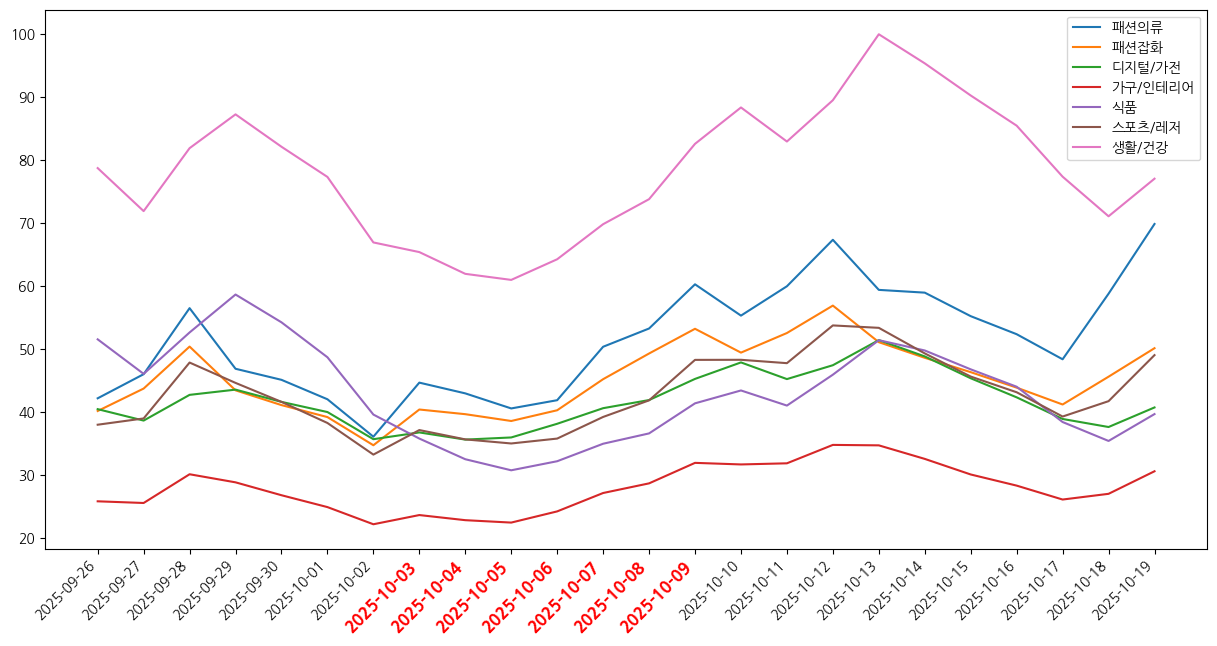

In [36]:

search_cat = df_category[(df_category['level'] == 1) & (df_category['name'] != '면세점')]
print(search_cat)
draw_shopping_plot(search_cat, "2025-09-26", "2025-10-19")